# Competition: iWildCam 2019 - FGVC

### Prepare the environment and download data

In [1]:
import tensorflow as tf

/home/moon/Desktop/lu_lab/ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/moon/Desktop/lu_lab/ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/moon/Desktop/lu_lab/ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/moon/Desktop/lu_lab/ml/lib/python3.6/

In [2]:
tf.__version__

'2.0.0'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18041535734319365496
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14032058403384056406
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2679640303256351274
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14938520606972592935
physical_device_desc: "device: XLA_GPU device"
]


In [4]:
!pip install -q -U dlai

In [6]:
!pip install -q -U toai

In [32]:
!ls a_pic

iwildcam-2019-fgvc6.zip  pictures


In [31]:
# !kaggle competitions download -c iwildcam-2019-fgvc6 -p a_pic/

In [35]:
# !unzip a_data/iwildcam-2019-fgvc6.zip -d a_data/pictures

In [38]:
!ls a_pic/pictures/iwildcam-2019-fgvc6/

sample_submission.csv  test.csv		train.csv
test		       test_images.zip	train_images.zip


In [36]:
!ls -U {DATA_DIR} | head -5

59c17a18-23d2-11e8-a6a3-ec086b02610b.jpg
5a2963b2-23d2-11e8-a6a3-ec086b02610b.jpg
58f8ce52-23d2-11e8-a6a3-ec086b02610b.jpg
59d419ed-23d2-11e8-a6a3-ec086b02610b.jpg
59ddc012-23d2-11e8-a6a3-ec086b02610b.jpg
ls: write error: Broken pipe


# Import libraries

In [8]:
from toai.imports import *
from toai.data import Dataset, DataParams, DataContainer, split_df
from toai.models import save_keras_model, load_keras_model
from toai.metrics import sparse_top_2_categorical_accuracy
from toai.image import (
    ImageLearner,
    ImageAugmentor,
    ImageDataset,
    ImageParser,
    ImageResizer,
    LearningRateFinder,
    ImageTrainingStep,
    ImageTrainer,
)
from toai.utils import download_file, unzip, save_file, load_file
import tensorflow as tf
from tensorflow import keras
# import efficientnet.tfkeras as efn

In [10]:
from dlai.imports import *

In [28]:
DATA_DIR = Path("a_pic/pictures/iwildcam-2019-fgvc6/train/train_images")
TEMP_DIR = Path("temp/scenes")
DATA_DIR.mkdir(parents=True, exist_ok=True)
TEMP_DIR.mkdir(parents=True, exist_ok=True)

# Prepare data

In [12]:
train = pd.read_csv('a_pic/pictures/iwildcam-2019-fgvc6/train.csv')

In [13]:
train.head().T

,0,1,2,3,4
category_id,19,19,0,0,0
date_captured,2011-05-13 23:43:18,2012-03-17 03:48:44,2014-05-11 11:56:46,2013-10-06 02:00:00,2011-07-12 13:11:16
file_name,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg
frame_num,1,2,1,1,3
id,5998cfa4-23d2-11e8-a6a3-ec086b02610b,588a679f-23d2-11e8-a6a3-ec086b02610b,59279ce3-23d2-11e8-a6a3-ec086b02610b,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,599fbd89-23d2-11e8-a6a3-ec086b02610b
location,33,115,96,57,46
rights_holder,Justin Brown,Justin Brown,Erin Boydston,Erin Boydston,Justin Brown
seq_id,6f084ccc-5567-11e8-bc84-dca9047ef277,6f12067d-5567-11e8-b3c0-dca9047ef277,6faa92d1-5567-11e8-b1ae-dca9047ef277,6f7d4702-5567-11e8-9e03-dca9047ef277,6f1728a1-5567-11e8-9be7-dca9047ef277
seq_num_frames,3,3,1,1,3
width,1024,1024,1024,1024,1024


In [32]:
for index, value in train.iterrows():
    for_val = DATA_DIR/value[2]
    train.at[index,'file_name'] = for_val

In [33]:
train.head()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,a_pic/pictures/iwildcam-2019-fgvc6/train/train...,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,a_pic/pictures/iwildcam-2019-fgvc6/train/train...,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,a_pic/pictures/iwildcam-2019-fgvc6/train/train...,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,a_pic/pictures/iwildcam-2019-fgvc6/train/train...,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,a_pic/pictures/iwildcam-2019-fgvc6/train/train...,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


In [14]:
train.category_id.value_counts()

0     131457
19     14106
13      8623
11      7209
8       6938
1       6102
16      5975
17      4759
3       3398
18      3035
4       2210
14      1361
10      1093
22        33
Name: category_id, dtype: int64

In [15]:
len(train)

196299

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196299 entries, 0 to 196298
Data columns (total 11 columns):
category_id       196299 non-null int64
date_captured     196299 non-null object
file_name         196299 non-null object
frame_num         196299 non-null int64
id                196299 non-null object
location          196299 non-null int64
rights_holder     196299 non-null object
seq_id            196299 non-null object
seq_num_frames    196299 non-null int64
width             196299 non-null int64
height            196299 non-null int64
dtypes: int64(6), object(5)
memory usage: 16.5+ MB


In [19]:
train[['width', 'height']].describe()

,width,height
count,196299.0,196299.000000
mean,1024.0,747.486600
std,0.0,3.128948
min,1024.0,747.000000
25%,1024.0,747.000000
50%,1024.0,747.000000
75%,1024.0,747.000000
max,1024.0,768.000000


In [27]:
train.height.value_counts()

747    189960
768      4459
748      1880
Name: height, dtype: int64

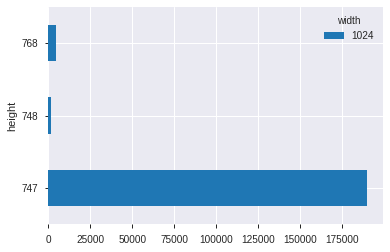

In [23]:
train.groupby('width').height.value_counts().unstack(0).plot.barh();

In [ ]:
test = pd.read_csv('a_pic/pictures/iwildcam-2019-fgvc6/test.csv')

In [49]:
test.head().T

,0,1,2,3,4
date_captured,2016-01-03 11:30:56,2016-01-03 11:30:57,2016-01-03 11:30:58,2016-01-03 11:30:59,2016-01-03 11:31:00
file_name,bce932f6-2bf6-11e9-bcad-06f10d5896c4.jpg,bce932f7-2bf6-11e9-bcad-06f10d5896c4.jpg,bce932f8-2bf6-11e9-bcad-06f10d5896c4.jpg,bce932f9-2bf6-11e9-bcad-06f10d5896c4.jpg,bce932fa-2bf6-11e9-bcad-06f10d5896c4.jpg
frame_num,1,2,3,4,5
id,bce932f6-2bf6-11e9-bcad-06f10d5896c4,bce932f7-2bf6-11e9-bcad-06f10d5896c4,bce932f8-2bf6-11e9-bcad-06f10d5896c4,bce932f9-2bf6-11e9-bcad-06f10d5896c4,bce932fa-2bf6-11e9-bcad-06f10d5896c4
location,37,37,37,37,37
rights_holder,Idaho Department of Fish and Game,Idaho Department of Fish and Game,Idaho Department of Fish and Game,Idaho Department of Fish and Game,Idaho Department of Fish and Game
seq_id,6e9ac61c-2e32-11e9-90ef-dca9047ef277,6e9ac61c-2e32-11e9-90ef-dca9047ef277,6e9ac61c-2e32-11e9-90ef-dca9047ef277,6e9ac61c-2e32-11e9-90ef-dca9047ef277,6e9ac61c-2e32-11e9-90ef-dca9047ef277
seq_num_frames,5,5,5,5,5
width,1024,1024,1024,1024,1024
height,726,726,726,726,726


As test dataset don't have labels I will do training and validation only on training set.

In [34]:
train_data, valid_data, test_data = ImageDataset.split(
    dataset=ImageDataset.from_dataframe(train, 'file_name', 'category_id'),
    fracs=(0.8, 0.1, 0.1),
)

# Start creating model

In [37]:
IMG_DIMS = 100, 100, 3

In [38]:
train_image_dataset = (
    train_data
    .dataset(batch_size=32, img_dims=IMG_DIMS, shuffle=True)
    .make_pipeline(
        image_pipeline=[
            ImageParser(),
            ImageResizer(img_dims=IMG_DIMS, resize="stretch"),
            ImageAugmentor(level=3, flips="both"),
        ],
    )
    .save_pipeline(TEMP_DIR/"train")
    .preprocess()
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type PosixPath).